<a href="https://colab.research.google.com/github/tec03/continuous_learning/blob/main/intgrl_aprox_simul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Methods for Approximation and Simulation

#1. Newton Interpolation with Divided Differences


**Newton Interpolation** is a numerical method used to estimate the value of a function between known data points. It is especially useful when the data points are not equally spaced and when we need an incremental and recursive way to build interpolation models.


## Goal
Given a set of known points $(x_0, y_0), (x_1, y_1), \ldots, (x_n, y_n) $, the objective is to estimate the function $ f(x) $ at some new point $ x \in [x_0, x_n] $.



## Newton’s Interpolation Polynomial

The polynomial is constructed incrementally using **divided differences**:

$$P(x) = f[x_0] + f[x_0, x_1](x - x_0) + f[x_0, x_1, x_2](x - x_0)(x - x_1) + \cdots$$

Where:
- $ f[x_0] = y_0 $
- $ f[x_0, x_1] = \frac{f[x_1] - f[x_0]}{x_1 - x_0} $
- $ f[x_0, x_1, x_2] = \frac{f[x_1, x_2] - f[x_0, x_1]}{x_2 - x_0} $, and so on.

Each term improves the accuracy by incorporating higher-order corrections.



## Advantages of Newton Interpolation

| Advantage                  | Explanation                                      |
|-|--|
| Recursive and extendable   | New data points can be added efficiently         |
| Works with uneven spacing  | No need for evenly spaced $ x $-values         |
| Numerically stable         | Better than Lagrange for larger data sets        |
| Python-friendly            | Easy to implement with lists or NumPy arrays     |






## General Workflow

1. Start with known data: $ (x_i, y_i) $
2. Compute the divided difference table
3. Construct the Newton interpolating polynomial
4. Evaluate $ P(x) $ at new $ x $-values
5. Verify with known values and Visualize



## Summary

Newton Interpolation is a perfect starting point for:
- Modeling unknown values from real data
- Building predictive tools (like machining estimators)
- Creating smooth functions from sparse measurements (like deformation profiles)

Welcome to Newton Interpolation

Enter x values separated by commas: 40, 60, 90, 120
Enter y values separated by commas: 10, 13, 20, 33
Enter the x value to interpolate: 86


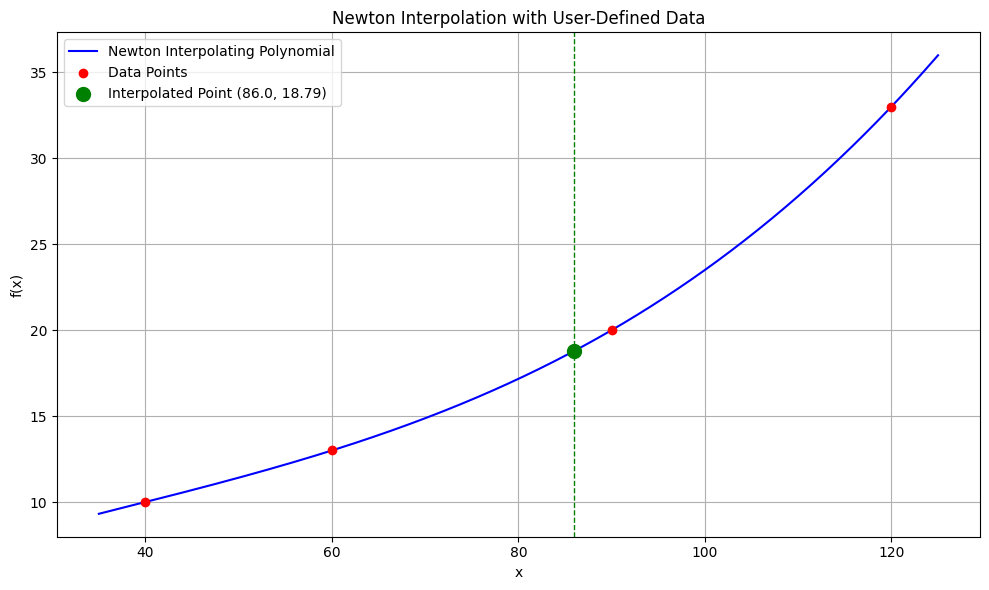

Interpolated value at x = 86.0 is: 18.79


(np.float64(18.793666666666663), 'newton_interpolation_user_plot.png')

In [1]:
import numpy as np
import matplotlib.pyplot as plt

print("Welcome to Newton Interpolation\n")

# Simulate user input (this can be replaced with input() for interactive use)
x_input = input("Enter x values separated by commas: ")
y_input = input("Enter y values separated by commas: ")
x_eval = float(input("Enter the x value to interpolate: "))

if not x_input or not y_input:
    print("Please provide both x and y values.")
    exit()
if len(x_input.split(',')) != len(y_input.split(',')):
    print("Number of x values must match the number of y values.")
    exit()


# Convert input strings to numeric arrays
x_vals = np.array([float(val.strip()) for val in x_input.split(',')])
y_vals = np.array([float(val.strip()) for val in y_input.split(',')])

# Newton Divided Difference Function
def newton_divided_diff(x, y):
    n = len(x)
    coef = np.copy(y).astype(float)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j - 1]) / (x[j:n] - x[j - 1])
    return coef

# Polynomial evaluation
def newton_poly(coef, x_data, x):
    n = len(coef)
    p = coef[0]
    for k in range(1, n):
        term = coef[k]
        for j in range(k):
            term *= (x - x_data[j])
        p += term
    return p

# Compute coefficients and interpolated value
coeffs = newton_divided_diff(x_vals, y_vals)
y_eval = newton_poly(coeffs, x_vals, x_eval)

# Plotting
x_plot = np.linspace(min(x_vals)-5, max(x_vals)+5, 500)
y_plot = [newton_poly(coeffs, x_vals, xi) for xi in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Newton Interpolating Polynomial', color='blue')
plt.scatter(x_vals, y_vals, color='red', label='Data Points', zorder=5)
plt.scatter(x_eval, y_eval, color='green', s=100, label=f'Interpolated Point ({x_eval}, {y_eval:.2f})', zorder=6)
plt.axvline(x=x_eval, color='green', linestyle='--', linewidth=1)
plt.title('Newton Interpolation with User-Defined Data')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save plot
plot_path = "newton_interpolation_user_plot.png"
plt.savefig(plot_path)
plt.show()

print(f"Interpolated value at x = {x_eval} is: {y_eval:.2f}")

y_eval, plot_path


## Numerical Integration

## What is Numerical Integration?

Numerical integration is used to approximate the **definite integral** of a function when:
- We only have data points
- The function is too complex to integrate analytically

In simple terms, it's a way to estimate the **area under a curve**.


# 2. Trapezoidal Rule

The **Trapezoidal Rule** approximates the area under a curve by dividing it into trapezoids and summing their areas.

### Formula (Single Interval):
$$
\int_a^b f(x)\,dx \approx \frac{b - a}{2} \left[f(a) + f(b)\right]
$$



### Composite Trapezoidal Rule (Multiple Intervals):
If the interval $[a, b]$ is divided into $n$ equal subintervals of width $ h = \frac{b - a}{n} $:

$$
\int_a^b f(x)\,dx \approx \frac{h}{2} \left[f(x_0) + 2f(x_1) + 2f(x_2) + \cdots + 2f(x_{n-1}) + f(x_n)\right]
$$

This is very simple and works well for **smooth functions**.



## Applications:
- Estimate *total machining time, total force*, or *area under measurement curves*
- Compute *deformation area*, or *volume differences between surfaces*

In [3]:
import numpy as np

# Function to evaluate the user-defined expression safely
def evaluate_function(expr, x):
    return eval(expr, {"x": x, "np": np, "sin": np.sin, "cos": np.cos, "exp": np.exp, "log": np.log})

# Trapezoidal Rule Implementation
def trapezoidal_rule(fx, a, b, n):
    h = (b - a) / n
    result = evaluate_function(fx, a) + evaluate_function(fx, b)

    for i in range(1, n):
        xi = a + i * h
        result += 2 * evaluate_function(fx, xi)

    return (h / 2) * result

# User inputs
print("Welcome to Trapezoidal Rule for Numerical Integration\n")
func_expr = input("Enter the function f(x) (e.g., sin(x), x**2 + 3*x): ")
a = float(input("Enter the lower limit of integration (a): "))
b = float(input("Enter the upper limit of integration (b): "))
n = int(input("Enter the number of intervals (n): "))

# Ensure valid input
if n <= 0 or a >= b:
    print("Invalid input. Ensure a < b and n > 0.")
else:
    approx = trapezoidal_rule(func_expr, a, b, n)
    print(f"\nApproximate value of the integral from {a} to {b} is: {approx:.6f}")


Welcome to Trapezoidal Rule for Numerical Integration

Enter the function f(x) (e.g., sin(x), x**2 + 3*x): 1/(2+0.1*x)
Enter the lower limit of integration (a): 0
Enter the upper limit of integration (b): 30
Enter the number of intervals (n): 5

Approximate value of the integral from 0.0 to 30.0 is: 9.225276


## 3. Simpson’s Rules

Simpson’s methods provide more *accurate integration* using *parabolic approximations* instead of trapezoids.



### Simpson’s 1/3 Rule:

Used when the number of intervals $n$ is *even*.

$$
\int_a^b f(x)\,dx \approx \frac{h}{3} \left[ f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + \cdots + 4f(x_{n-1}) + f(x_n) \right]
$$



### Simpson’s 3/8 Rule:

Used when $n$ is a multiple of **3**.


$$
\int_a^b f(x)\,dx \approx \frac{3h}{8} \left[ f(x_0) + 3f(x_1) + 3f(x_2) + 2f(x_3) + \cdots + f(x_n) \right]
$$

Simpson’s rules are *much more accurate* for smooth, continuous functions.



| Rule              | Accuracy    | Complexity | Good for...                       |
|-|-||--|
| Trapezoidal       | Moderate    | Simple     | General usage, quick estimates    |
| Simpson’s 1/3     | High        | Moderate   | Smooth curves, higher precision   |
| Simpson’s 3/8     | Very High   | Slightly more complex | Special cases, high precision needs |




### Summary

Numerical integration allows students to:
- Compute physical quantities like area, volume, or total force
- Analyze measured data from machining or deformation
- Solve real problems where no exact antiderivative exists

In [4]:
import numpy as np

# Function to safely evaluate f(x) as a string expression
def evaluate_function(expr, x):
    return eval(expr, {
        "x": x,
        "np": np,
        "sin": np.sin,
        "cos": np.cos,
        "exp": np.exp,
        "log": np.log,
        "sqrt": np.sqrt
    })

# Simpson's 1/3 Rule implementation
def simpsons_one_third(expr, a, b, n):
    if n % 2 != 0:
        raise ValueError("Number of intervals n must be even for Simpson's 1/3 Rule.")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = evaluate_function(expr, x)

    result = y[0] + y[-1]  # f(x0) + f(xn)

    # Add 4 * f(x_odd) + 2 * f(x_even)
    result += 4 * np.sum(y[1:n:2])  # odd indices
    result += 2 * np.sum(y[2:n-1:2])  # even indices

    return (h / 3) * result


print("Welcome to Simpson’s 1/3 Rule for Numerical Integration\n")
func_expr = input("Enter the function f(x) (e.g., sin(x), x**2 + 3*x): ")
a = float(input("Enter the lower limit of integration (a): "))
b = float(input("Enter the upper limit of integration (b): "))
n = int(input("Enter the number of intervals (must be even): "))

# Check validity and calculate
if n <= 0 or a >= b or n % 2 != 0:
    print("Invalid input. Ensure that a < b, n > 0, and n is even.")
else:
    approx = simpsons_one_third(func_expr, a, b, n)
    print(f"\nApproximate value of the integral from {a} to {b} is: {approx:.6f}")


Welcome to Simpson’s 1/3 Rule for Numerical Integration

Enter the function f(x) (e.g., sin(x), x**2 + 3*x): 1/(2+0.1*x)
Enter the lower limit of integration (a): 0
Enter the upper limit of integration (b): 30
Enter the number of intervals (must be even): 6

Approximate value of the integral from 0.0 to 30.0 is: 9.164021


In [6]:
import numpy as np

# Function to safely evaluate a user-defined function at x
def evaluate_function(expr, x):
    return eval(expr, {
        "x": x,
        "np": np,
        "sin": np.sin,
        "cos": np.cos,
        "exp": np.exp,
        "log": np.log,
        "sqrt": np.sqrt
    })

# Simpson's 3/8 Rule implementation
def simpsons_three_eighth(expr, a, b, n):
    if n % 3 != 0:
        raise ValueError("Number of intervals n must be a multiple of 3 for Simpson's 3/8 Rule.")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = evaluate_function(expr, x)

    result = y[0] + y[-1]

    for i in range(1, n):
        if i % 3 == 0:
            result += 2 * y[i]
        else:
            result += 3 * y[i]

    return (3 * h / 8) * result

# User input section
print("Wlcome to Simpson’s 3/8 Rule for Numerical Integration \n")
func_expr = input("Enter the function f(x) (e.g., sin(x), x**2 + 3*x): ")
a = float(input("Enter the lower limit of integration (a): "))
b = float(input("Enter the upper limit of integration (b): "))
n = int(input("Enter the number of intervals (must be a multiple of 3): "))

# Check input validity and compute result
if n <= 0 or a >= b or n % 3 != 0:
    print("Invalid input. Ensure that a < b, n > 0, and n is a multiple of 3.")
else:
    approx = simpsons_three_eighth(func_expr, a, b, n)
    print(f"\nApproximate value of the integral from {a} to {b} is: {approx:.6f}")


Wlcome to Simpson’s 3/8 Rule for Numerical Integration 

Enter the function f(x) (e.g., sin(x), x**2 + 3*x): 1/(2+0.1*x)
Enter the lower limit of integration (a): 0
Enter the upper limit of integration (b): 30
Enter the number of intervals (must be a multiple of 3): 6

Approximate value of the integral from 0.0 to 30.0 is: 9.165179


# 4. Euler's Method for Solving Initial Value Problems


El Método de Euler es una de las técnicas más sencillas e intuitivas para aproximar soluciones de ecuaciones diferenciales ordinarias (EDOs) con una condición inicial dada. Es especialmente útil cuando obtener una solución analítica es difícil o imposible.

Dado un problema de valor inicial de la forma:
$$
\cfrac{dy}{dx} = f(x, y), \text{ con } y(x₀) = y₀,
$$
el método de Euler construye una solución aproximada avanzando en pequeños pasos de tamaño h a lo largo del eje x, utilizando la pendiente definida por f(x, y).

La fórmula de actualización es:

$$y_{n+1} = y_{n} + h·f(x_{n}, y_{n})$$

Este método es explícito, de primer orden y numérico. Aunque no siempre es el más preciso, sirve como base para métodos más avanzados como el de Heun o los métodos de Runge-Kutta.

En esta libreta implementaremos paso a paso el Método de Euler y exploraremos su comportamiento con distintos tamaños de paso y funciones.



Welcome to Euler's Method for Solving Initial Value Problems

Enter the function f(x, y): -0.6*y + 5
Enter the initial x value: 0
Enter the initial y value: 0
Enter the step size (h): 1
Enter the number of steps (N): 6

Euler's Method Results:
x = 0.0000, y = 0.0000
x = 1.0000, y = 5.0000
x = 2.0000, y = 7.0000
x = 3.0000, y = 7.8000
x = 4.0000, y = 8.1200
x = 5.0000, y = 8.2480
x = 6.0000, y = 8.2992
You have to enter the solution (integral) of the initial value problem, to see exact solution
Enter the exact solution: (25/3)*(1-e**(-0.6*x))


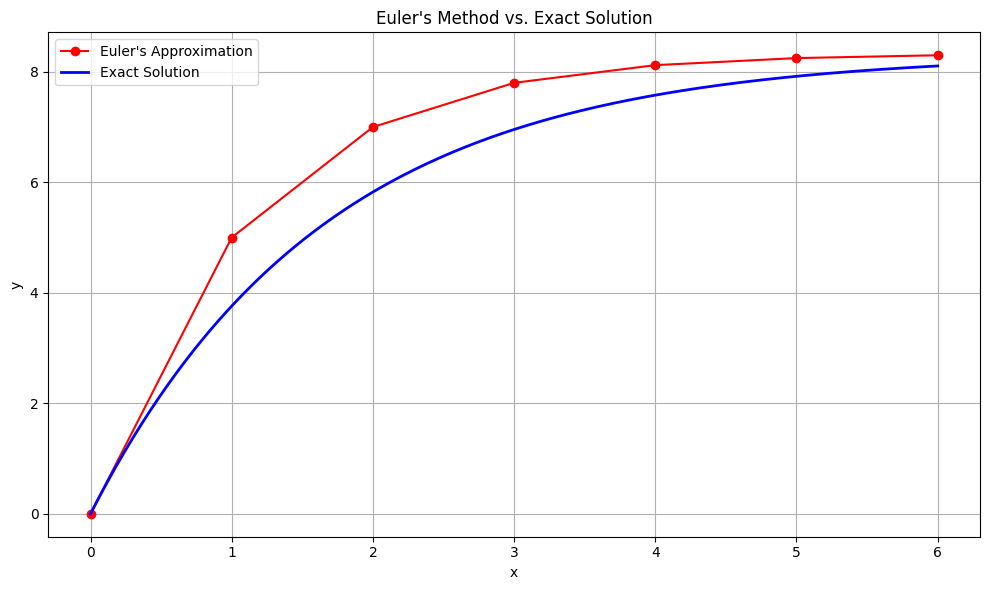

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Safely evaluate user-defined f(x, y)
def evaluate_function(expr, x, y):
    return eval(expr, {
        "x": x,
        "y": y,
        "np": np,
        "sin": np.sin,
        "cos": np.cos,
        "exp": np.exp,
        "log": np.log,
        "sqrt": np.sqrt,
        "e": np.e
    })

# Euler's Method
def euler_method(f_expr, x0, y0, h, N):
    x_vals = [x0]
    y_vals = [y0]
    x = x0
    y = y0
    for i in range(N):
        y = y + h * evaluate_function(f_expr, x, y)
        x = x + h
        x_vals.append(x)
        y_vals.append(y)
    return x_vals, y_vals

print("Welcome to Euler's Method for Solving Initial Value Problems\n")
f_expr = input("Enter the function f(x, y): ")
x0 = float(input("Enter the initial x value: "))
y0 = float(input("Enter the initial y value: "))
h = float(input("Enter the step size (h): "))
N = int(input("Enter the number of steps (N): "))


# Analytical solution for comparison (only works for this demo case)
def exact_solution(x):
    print("You have to enter the solution (integral) of the initial value problem, to see exact solution")
    temp_expr = input("Enter the exact solution: ")
    return evaluate_function(temp_expr, x, 0)


# Run Euler's Method
x_vals, y_vals = euler_method(f_expr, x0, y0, h, N)

print("\nEuler's Method Results:")
for i in range(len(x_vals)):
    print(f"x = {x_vals[i]:.4f}, y = {y_vals[i]:.4f}")
# Plotting
x_exact = np.linspace(x0, x0 + N*h, 200)
y_exact = exact_solution(x_exact)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, 'ro-', label="Euler's Approximation")
plt.plot(x_exact, y_exact, 'b-', label="Exact Solution", linewidth=2)
plt.title("Euler's Method vs. Exact Solution")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Welcome to Euler's Method for Solving Systems of ODEs of higher orders 

Enter the initial value of y1: 0
Enter the initial value of y2: 0
Enter the initial time (t0): 0
Enter the step size (h): 0.1
Enter the number of steps (N): 10
This works only for this demo eg. else you have to improve this fun. 
This works only for this demo eg. else you have to improve this fun. 

Euler's Method Results:
t = 0.0000, y1 = 0.0000, y2 = 0.0000
t = 0.1000, y1 = 0.0000, y2 = 1.0000
t = 0.2000, y1 = 0.1000, y2 = 1.8000
t = 0.3000, y1 = 0.2800, y2 = 2.3900
t = 0.4000, y1 = 0.5190, y2 = 2.7720
t = 0.5000, y1 = 0.7962, y2 = 2.9581
t = 0.6000, y1 = 1.0920, y2 = 2.9684
t = 0.7000, y1 = 1.3888, y2 = 2.8287
t = 0.8000, y1 = 1.6717, y2 = 2.5685
t = 0.9000, y1 = 1.9286, y2 = 2.2190
t = 1.0000, y1 = 2.1505, y2 = 1.8109


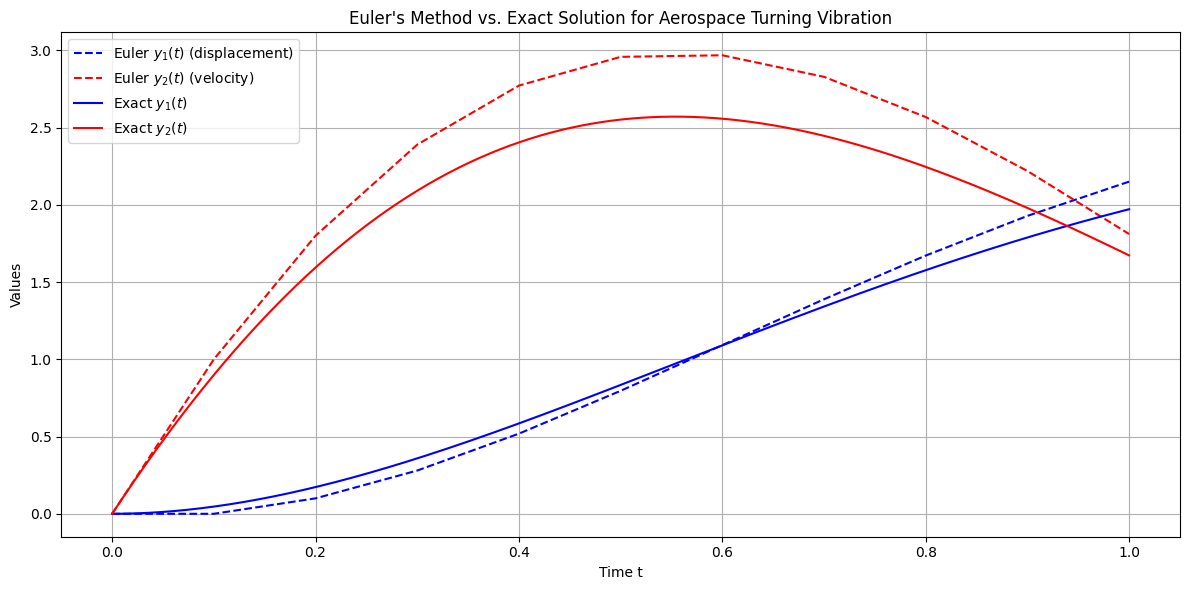

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Euler method for a system of two ODEs with improved performance
def euler_system_optimized(f1, f2, y1_0, y2_0, t0, h, N):
    t_vals = np.linspace(t0, t0 + N*h, N+1)
    y1_vals = np.zeros(N+1)
    y2_vals = np.zeros(N+1)

    y1_vals[0] = y1_0
    y2_vals[0] = y2_0

    for i in range(N):
        y1_vals[i+1] = y1_vals[i] + h * f1(t_vals[i], y1_vals[i], y2_vals[i])
        y2_vals[i+1] = y2_vals[i] + h * f2(t_vals[i], y1_vals[i], y2_vals[i])

    return t_vals, y1_vals, y2_vals

# Define the system of ODEs
f1 = lambda t, y1, y2: y2
f2 = lambda t, y1, y2: -2*y2 - 5*y1 + 10


# These constants will now be recalculated correctly
def exact_y1(t):
    A = -2
    B = -1
    print("This works only for this demo eg. else you have to improve this fun. ")
    return np.exp(-t) * (A * np.cos(2 * t) + B * np.sin(2 * t)) + 2

def exact_y2(t):
    A = -2
    B = -1
    print("This works only for this demo eg. else you have to improve this fun. ")
    return np.exp(-t) * ((2*B - A) * np.cos(2 * t) + (-2*A - B) * np.sin(2 * t))

print("Welcome to Euler's Method for Solving Systems of ODEs of higher orders \n")


# Initial conditions and parameters
y1_0 = input("Enter the initial value of y1: ")
y2_0 = input("Enter the initial value of y2: ")
t0 = float(input("Enter the initial time (t0): "))
h = float(input("Enter the step size (h): "))
N = int(input("Enter the number of steps (N): "))



# Run optimized Euler simulation
t_vals, y1_vals, y2_vals = euler_system_optimized(f1, f2, y1_0, y2_0, t0, h, N)

# Generate exact values for plotting
t_exact = np.linspace(t0, t0 + N*h, 1000)
y1_exact = exact_y1(t_exact)
y2_exact = exact_y2(t_exact)

print("\nEuler's Method Results:")
for i in range(len(t_vals)):
    print(f"t = {t_vals[i]:.4f}, y1 = {y1_vals[i]:.4f}, y2 = {y2_vals[i]:.4f}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t_vals, y1_vals, 'b--', label="Euler $y_1(t)$ (displacement)")
plt.plot(t_vals, y2_vals, 'r--', label="Euler $y_2(t)$ (velocity)")
plt.plot(t_exact, y1_exact, 'b-', label="Exact $y_1(t)$")
plt.plot(t_exact, y2_exact, 'r-', label="Exact $y_2(t)$")
plt.title("Euler's Method vs. Exact Solution for Aerospace Turning Vibration")
plt.xlabel("Time t")
plt.ylabel("Values")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 5.  Runge-Kutta 4th Order Method (RK4)


El **método de Runge-Kutta de cuarto orden (RK4)** es uno de los métodos numéricos más utilizados y precisos para resolver **ecuaciones diferenciales ordinarias (EDOs)** con condiciones iniciales.

A diferencia del método de Euler, que utiliza una única evaluación de la derivada por paso, RK4 utiliza **cuatro estimaciones del valor de la pendiente** dentro de cada intervalo, lo que proporciona una mejor aproximación con menor error.

Dado un problema de valor inicial:

$$
\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0
$$

El método RK4 utiliza las siguientes fórmulas:


\begin{aligned}
k_1 &= h \cdot f(x_n, y_n) \\
k_2 &= h \cdot f\left(x_n + \frac{h}{2}, y_n + \frac{k_1}{2}\right) \\
k_3 &= h \cdot f\left(x_n + \frac{h}{2}, y_n + \frac{k_2}{2}\right) \\
k_4 &= h \cdot f(x_n + h, y_n + k_3) \\
y_{n+1} &= y_n + \frac{1}{6}\Big(k_1 + 2k_2 + 2k_3 + k_4\Big)
\end{aligned}




Welcome to the Runge-Kutta 4th Order Method Simulator!
Enter the differential equation f(x, y) (e.g., x + y): -0.6*y+5
Enter initial x (x0): 0
Enter initial y (y0): 0
Enter step size h: 1
Enter number of steps N: 5
Enter exact solution y(x), or leave blank if unknown: (25/3)*(1-e**(-0.6*x))
RK4 Approximation Results:
x = 0.0000, y = 0.0000
x = 1.0000, y = 3.7550
x = 2.0000, y = 5.8180
x = 3.0000, y = 6.9514
x = 4.0000, y = 7.5741
x = 5.0000, y = 7.9162


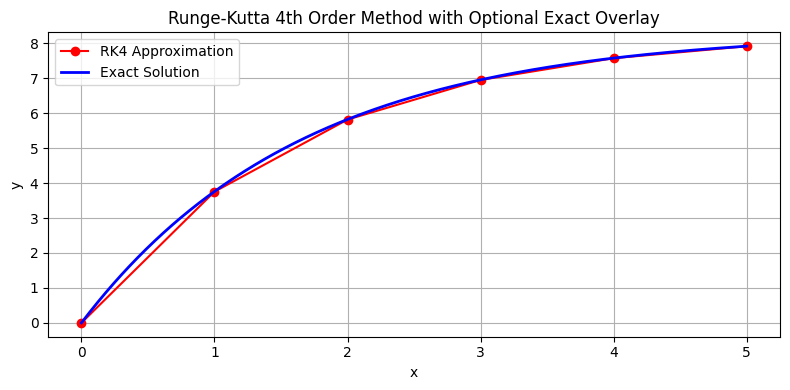

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to safely evaluate f(x, y)
def evaluate_function(expr, x, y):
    return eval(expr, {"x": x, "y": y, "np": np, "sin": np.sin, "cos": np.cos, "exp": np.exp, "log": np.log, "e": np.e})

# Function to evaluate exact solution
def evaluate_exact(expr, x):
    return eval(expr, {"x": x, "np": np, "sin": np.sin, "cos": np.cos, "exp": np.exp, "log": np.log, "e": np.e})

# RK4 implementation
def rk4(f_expr, x0, y0, h, N):
    x_vals = [x0]
    y_vals = [y0]
    x, y = x0, y0

    for _ in range(N):
        k1 = h * evaluate_function(f_expr, x, y)
        k2 = h * evaluate_function(f_expr, x + h/2, y + k1/2)
        k3 = h * evaluate_function(f_expr, x + h/2, y + k2/2)
        k4 = h * evaluate_function(f_expr, x + h, y + k3)
        y += (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h
        x_vals.append(x)
        y_vals.append(y)

    return np.array(x_vals), np.array(y_vals)

print("Welcome to the Runge-Kutta 4th Order Method Simulator!")

# Simulate user inputs (replace these with input() in a real script)
f_expr = input("Enter the differential equation f(x, y) (e.g., x + y): ")
x0 = float(input("Enter initial x (x0): "))
y0 = float(input("Enter initial y (y0): "))
h = float(input("Enter step size h: "))
N = int(input("Enter number of steps N: "))
exact_expr = input("Enter exact solution y(x), or leave blank if unknown: ")

# RK4 approximation
x_vals, y_vals = rk4(f_expr, x0, y0, h, N)

print("RK4 Approximation Results:")
for i in range(len(x_vals)):
    print(f"x = {x_vals[i]:.4f}, y = {y_vals[i]:.4f}")

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, 'ro-', label="RK4 Approximation")

# Exact solution overlay if provided
if exact_expr.strip() != "":
    x_exact = np.linspace(x0, x0 + N*h, 1000)
    y_exact = evaluate_exact(exact_expr, x_exact)
    plt.plot(x_exact, y_exact, 'b-', label="Exact Solution", linewidth=2)

plt.title("Runge-Kutta 4th Order Method with Optional Exact Overlay")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
